# <span style="color:red">Seaborn | Part-8: Categorical Data Plot</span>

## Categorical Data Background:

Hello guys! You have been doing a fabulous job as we've already covered a major segment of plotting with our previous set of lectures. Till now we have used regression techniques and majorly dealt with all possible parameters and data types. Now our concentration is going to be little more on categorical data. It isn't that we have not gone through categorical data till now but you certainly remember that on multiple occassions, we were generating random numbers with custom codes.

So, let us begin with the *intuition* behind **categorical data** and slowly and steady with this and upcoming lectures, we shall focus more on each type of plot that does shines out for Seaborn, when dealing with Categorical data.

**Categorical features** represent types of data which may be divided into groups. Examples of categorical variables could be something like *race*, *sex*, or even *educational* and *professional* details. While *educational* variable may also be considered in a numerical manner by using exact values for *highest grade completed*, it is often more informative to categorize such variables into a relatively small number of groups.

*Analysis of categorical data* generally involves the use of **data tables**. A **two-way table** is very common & presents categorical data by *counting the number of observations* that fall into each group for two variables, one divided into *rows* and the other divided into *columns*. This shall get more evident when we start plotting.

It would be nice to remember that the totals for each category are also known as **marginal distributions**, that provide the *number of individuals* in each *row* or *column*; without accounting for the effect of the other variable. And, since **simple counts** are often difficult to analyze, *two-way tables* are often *converted into percentages*.

The best representation that we can have for such a calculation would be a *segmented bar graph* depicting the breakdown of features, where segments of each bar are color-coded to correspond to the appropriate variable. This is exactly what we shall be doing throughout in different styles to suit our requirements.

Let us now closely look at what Seaborn has to offer. Their structure of plots are majorly divided into three segments and that is what we shall cover in this as well as upcoming two lectures:
- Swarmplot() and Stripplot() that show each observation at each level of the categorical variable.
- Boxplot() and Violinplot() that show an abstract representation of each distribution of observations.
- Barplot() and Pointplot() that apply a statistical estimation to show a measure of Central Tendency and Confidence Interval.

## <span style="color:red">Swarm Plot:</span>

In this lecture, we shall be discussing the first variety and without further delay, now I shall plot a **Swarmplot()** so that we can start our discussion.

In [96]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid", palette="icefire")
import warnings
warnings.filterwarnings("ignore")

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

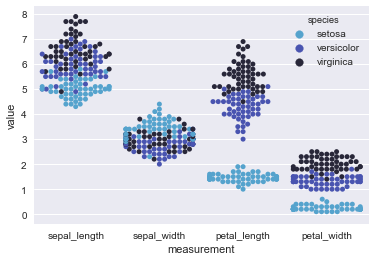

In [48]:
# Loading Iris dataset
iris = sns.load_dataset("iris")

# Melt dataset to 'long-form' or 'tidy' representation:
iris = pd.melt(iris, "species", var_name="measurement")

# Drawing a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris)

This plot is a *scattered* representation of *non-overlapping points* of the three species of Iris flower with difference in values of their *sepal length*, *sepal width*, *petal length* and *petal width*.

We could have plotted a *Scatterplot* instead but the size of dots are comparitively bigger and when the dataset gets bigger and bigger, this bee swarm gets more convenient to use. Here, we may easily visualize that *Setosa sepal length* is smaller than *Versicolor* and *Virginica* but their *width* is more than the other two. Pretty much same case in terms of *petal length* as well but this time even the *width of petals* remain smaller than rest two varities of *Iris flower*.

Seaborn accepts a set of *parameters* apart from what mandatory parameters that we see in our code so let us go through those:

`seaborn.swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None)`

As we know, here `x` and `y` are expected to be name of our variables in data, and same holds good for `hue` parameter as well. `data` indicates our dataset. Officially, **Swarmplot** accepts **input data** in a variety of formats, like:
- Vectors of data represented as Lists, NumPy arrays, or Pandas Series object for `x`, `y`, and/or `hue` parameter.
- A long-form DataFrame, where data point plotting is determined by `x`, `y` and `hue` variables.
- A wide-form DataFrame, such that each numeric column gets plotted.
- Anything accepted by plt.boxplot (e.g. a 2d array or list of vectors)

The conversion of **wide to long** or from **long to wide** is always a one line code as we noticed above. Just to give you an idea, apart from `.melt()` function, **Pandas** also offer other functions like `.wide_to_long()` that does the job for us. Moving on to optional parameters, we have few important ones like `orient` that helps us alter the orientation of our plot to either *vertical* or *horizontal*. We also have `split` parameter which gets handy when we're applying `hue` parameter to our plot. Ideally, `split` is set to `False`, but if set to `True`, then it separates the strip for different `hue` levels along the categorical axis.

Let us quickly use these optional parameters on our previous plot to get a feel of it:

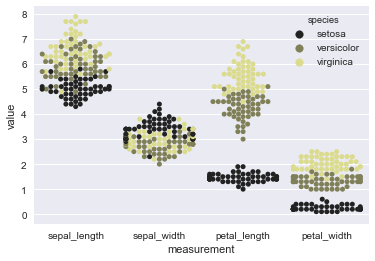

In [49]:
sns.swarmplot(x="measurement", y="value", hue="species", data=iris, orient='v', color=tableau_20[17], size=5)

We may even change the *order* of the categorical variables being on our *X-axis*. Let us try that:

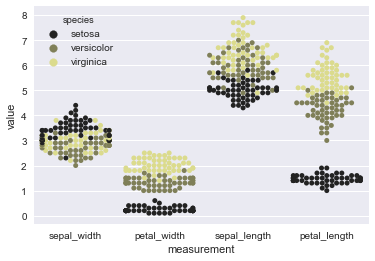

In [50]:
sns.swarmplot(x="measurement", y="value", hue="species", order=['sepal_width','petal_width','sepal_length','petal_length'], data=iris, color=tableau_20[17], size=5)

This makes our job easy when dataset is really huge and we need to compare few similar variables. Drag them side-by-side and visualize the difference for further analysis. Alteration of `hue_order` also gets quite handy. In our current plot, we notice *black* color for *Setosa* as a prominent separator so why not get it in the middle to ensure enhanced visual separation  of data points. Let's do that!

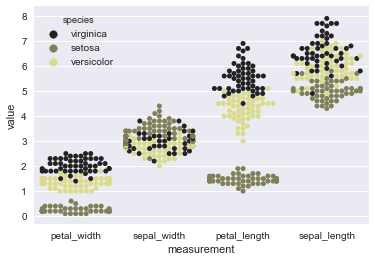

In [70]:
sns.swarmplot(x="measurement", y="value", hue="species", order=['petal_width','sepal_width','petal_length','sepal_length'], 
              hue_order=['virginica','setosa','versicolor'], data=iris, color=tableau_20[17], size=5)

Okay! We're done with parameter tweaking so let us now move on to use another Seaborn attribute for plotting our **beeswarms** on separate axes. This attribute is known as **Factorplot** and we shall discuss it majorly in the later section of the course BUT for now we shall just use it to get more mileage from our **Swarmplot**.

Little tired of *Iris* flower sets! Let us use our *Tips* dataset this time around.

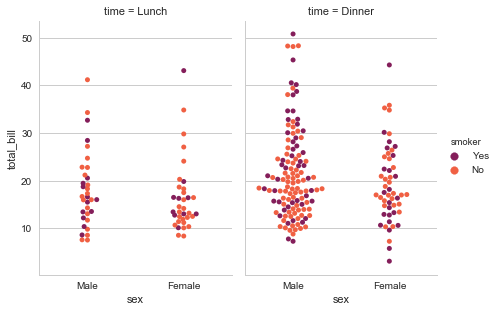

In [44]:
# Loading Tips dataset:
tips = sns.load_dataset("tips")

sns.factorplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, kind="swarm", size=4.5, aspect=.7, palette="rocket");

**Factorplot** has given us the flexibility to visualize our dataset, i.e. **Tips dataset**, in two separate segments within a single plot, segregated by the **time** of day. So the *first set of axes* help us understand the trend during **Lunch** time and on **right**, we get a set of axes for **Dinner** time. `hue` parameter reflects the `palette` parameter, which in turn displays data points in *separate colors*, where **smokers** are presented by *purple* color. With such a presentation, it gets easier to see the *bulk of customers* on basis of their **Gender**, the **total bill** that their arrival in the restaurant generates.

More often you shall find that it is never a Swarmplot that alone represents those data points, as it is generally combined with **Boxplot** or **Violinplots**, that we shall discuss in-depth later on in this course.

I won't get into great detail but will show you a simple way of mixing these **Swarmplots** with other plot. Let me use a **Boxplot** to demonstrate what I mean and as assured earlier, I will cover Boxplots later in much more depth with all it's *parameters* and *general use-cases*:

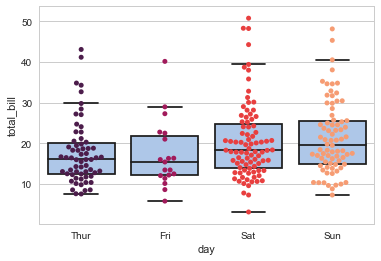

In [77]:
sns.swarmplot(x="day", y="total_bill", data=tips, palette="rocket")
sns.boxplot(x="day", y="total_bill", data=tips,
        showcaps=True, boxprops={'facecolor':tableau_20[1]},
        showfliers=False, whiskerprops={'linewidth':0})

It is the *width* of our beeswarm in the plot that matters, and is governed by the number of data points which are close together without overlapping.

You might not be able to correlate to it much because we haven't covered topics like *Boxplot* or *Violinplot* as of now. So, let me actually mix our *Swarmplot* with something that we've already covered to get a better idea. We shall generate some *random data* and use *Linear Regression* visualization technique that we learnt in previous lectures:

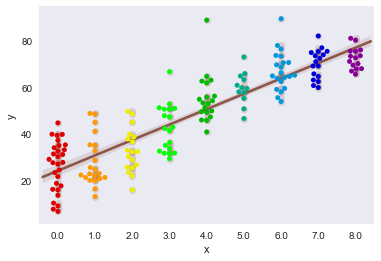

In [95]:
# Generating random data:
n= 19; m= 9
y_data = []
for i in range(m):
    a =  (np.random.poisson(lam=0.99 - float(i)/m, size=n) + i * 0.9 + np.random.rand(1)*2)
    a += (np.random.rand(n) -0.5) * 2
    y_data.append(a*m)
    
y_data = np.array(y_data).flatten()
x_data = np.floor(np.sort(np.random.rand(n*m)) * m)

# Creating a Pandas DataFrame out of those:
sample = pd.DataFrame({'x': x_data, 'y': y_data})

# Shall experiment mixing with Regplot:
sns.regplot(y= 'y', x= 'x', data= sample, color= tableau_20[10], scatter_kws= {"alpha" : 0.2})
sns.swarmplot(x= 'x', y= 'y', data= sample, palette= 'nipy_spectral_r')

I am sure few of you would prefer your regplot to have beeswarm scattering like this plot than complete Scatterplot but in my honest opinion, the choice varies with dataset and our objective with it.

I shall now show you another handy way of crafting Seaborn Swarmplots where you could get the **datapoint span** covered within the plots. Let me show you what I mean by generating some random data for it. We shall also make small use of underlying **Matplotlib patches** class to get a **shape** for our span.

In due course of getting our Swarm limits, we need to remember that **Swarmplot** actually returns the **Matplotlib Axes** instance, and from there we can find the `PathCollections` that it creates. To get precise datapoint positions, we will use `.get_offsets()` function provided by *Matplotlib*.

xmin=-0.2360196734721819, xmax=0.26754938607966094, ymin=-0.5220033629388873, ymax=0.9717510813438393
xmin=0.8874982552155186, xmax=1.1181682453140485, ymin=0.5576829181949443, ymax=1.5423815864613242


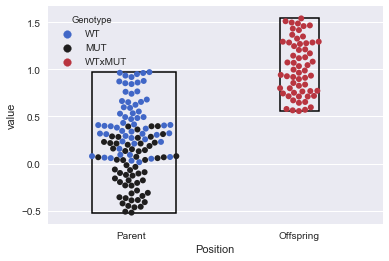

In [128]:
# Fetching Matplotlib dependancy:
from matplotlib.patches import Rectangle

# Generating random data:
a = np.random.random(60)
b = np.random.random(60) - 0.6
c = np.random.random(60) + 0.55 

# Let us now melt these datapoints into a DataFrame:
sample = pd.DataFrame({'a1': a, 'a2': b, 'a3': c}) 
sample.columns = [list(['WT', 'MUT', 'WTxMUT']), list(['Parent', 'Parent', 'Offspring'])]
sample.columns.names = ['Genotype', 'Position']
sample_melt = pd.melt(sample) 

ax = sns.swarmplot(data=sample_melt, x='Position', y='value', hue='Genotype', palette='icefire', size=6)

# Defining Function for transposing data with statistical computations and shape:
def getdatalim(col_l):
    x,y = np.array(col_l.get_offsets()).T
    try:
        print ('xmin={}, xmax={}, ymin={}, ymax={}'.format(x.min(), x.max(), y.min(), y.max()))
        rect = Rectangle((x.min(),y.min()),x.ptp(),y.ptp(), edgecolor='k', facecolor= 'None', lw=1.5)
        ax.add_patch(rect)
    except ValueError:
        pass

getdatalim(ax.collections[0])       # For 'Parents' on X-Axis
getdatalim(ax.collections[1])       # For 'Offspring' on X-Axis

Now that we've seen enough variations with **Swarmplot** application, let us move on to discuss our next type of plot, that again does a decent job in showing each observation at each level of the categorical variable. These plots are known as **Stripplot**, and we shall discuss it in length in our next lecture.

Till then, I would highly recommend to play around with these plots as much as you can and if you have any doubts, feel free to post in the forum. Also, it would be nice if you could take out a minute of your time to leave a review or at least rate this course using Course Dashboard; because that shall help other students gauge if this course is worth their time and money.

And, I shall meet you in the next lecture. Till then, Happy Visualizing!